In [23]:
#Import libraries for calculations and visualization

In [125]:
import numpy as np
import seaborn as sns
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import itertools

In [126]:
#set the column names of the data taken from http://archive.ics.uci.edu/ml/datasets/Abalone
#read the csv, txt file names abalone_dataset.txt

column_names = ["Sex","Length","Diameter","Height","Whole Weight","Shucked Weight","Viscera Weight","Shell Weight", "y"]
data = pd.read_csv('abalone_dataset.txt',sep="\t",names=column_names)

In [127]:
#Overview of the data
data

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,y
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,3
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2


In [128]:
## split the data into 2 parts that refers to training set and validation set
## set the size of training set 100 and 1000 as the question describes

def split_train_validation(data,n):
    train       = data.sample(n=n)
    validation  = data.drop(train.index)
    
    return train,validation

In [129]:
## the defined split_train_validation function to obtain train & validation sets for the size 100 and 1000.

train100,validation100 = split_train_validation(data,100)
train1000,validation1000 = split_train_validation(data,1000)

## set the indexes of train and validation sets ascending and get rid of the old specific indexes
train100.reset_index(drop=True)
validation100.reset_index(drop=True)

train1000.reset_index(drop=True)
validation1000.reset_index(drop=True)


,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,y
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,3
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
3172,M,0.500,0.380,0.125,0.5770,0.2690,0.1265,0.1535,2
3173,M,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,2
3174,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,2
3175,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2


In [130]:
## calculate the prior likelihoods for y occurances

def calculate_y_prior(train):
    y_prior = {
        1: 0,
        2: 0,
        3: 0
    }
    
    counts = train["y"].value_counts(ascending=True)
                
    total_num = len(train)
    y_prior[1] = round((counts[1]/total_num), 4) 
    y_prior[2] = round((counts[2]/total_num), 4) 
    y_prior[3] = round((counts[3]/total_num), 4) 
    
    return y_prior

In [131]:
# see the prior likelihoods of y = (1:, 2:, 3:)
y_prior = calculate_y_prior(data)
y_prior

{1: 0.2009, 2: 0.5693, 3: 0.2298}

In [132]:
## calculate sex likelihood for all options i.e.
# Number of instances that are female and belongs to 3 or Number of instances that are male and belongs to 1.

def calculate_sex_likelihoods(train):
    sex_likelihoods = {
      "F": [0,0,0,0],
      "I": [0,0,0,0],
      "M": [0,0,0,0]
    }

    for i in range(len(train)):
        for j in range(1,4):
            if(train.iat[i,0]=="F" and train.iat[i,8]==j): 
                sex_likelihoods["F"][j] += 1
            elif(train.iat[i,0]=="I" and train.iat[i,8]==j): 
                sex_likelihoods["I"][j] += 1
            elif(train.iat[i,0]=="M" and train.iat[i,8]==j): 
                sex_likelihoods["M"][j] += 1

    y_numbers = train['y'].value_counts(ascending=True)

    array = [0,y_numbers[1],y_numbers[2],y_numbers[3]]
    for i in range(1,4):
        sex_likelihoods["F"][i] = round((sex_likelihoods["F"][i]/array[i]),4)
        sex_likelihoods["I"][i] = round((sex_likelihoods["I"][i]/array[i]),4)
        sex_likelihoods["M"][i] = round((sex_likelihoods["M"][i]/array[i]),4)

    return sex_likelihoods

sex_likelihoods = calculate_sex_likelihoods(train100)

In [133]:
# calculate mean values and std. dev values for each row(for each criteria) and calculate it for each possible age i,e 1, 2, 3.
# the result of the calculated values should ve like mean of length [0, mean values for 1, for 2, for 3] and same for std. dev.

def calculate_train_values(train):
    train_values = {
        "length"    : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "diameter"  : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "height"    : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "whole_w"   : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "shucked_w" : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "viscera_w" : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "shell_w"   : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]}
    }
#get the column names (keys of the train_values) and store in the list keys
    keys = [] 
    for key in train_values.keys(): 
        keys.append(key) 
#find the y values of each row and put the values of keys accordingly to the train_values data set
# in brief ie. find the 1-2-3 values for the key "length" and append the values acoordingly to the "length" row of train_values
    for i in range(len(train)):
        for j in range(1,4):
            if(train.iat[i,8]==j): 
                for index in range(len(keys)):
                    train_values[keys[index]][j].append(train.iat[i,(index+1)])# index+1 bcz thre is sex column in train100 set
## calculate mean and std.dev. values for each row and for each ouput ie. 1-2-3
    for i in range(1,4):
        for index in range(len(keys)):
            train_values[keys[index]]["mean"][i] = round((np.mean(train_values[keys[index]][i])),4)
            train_values[keys[index]]["std"][i]  = round((np.std(train_values[keys[index]][i])),4)   
    return train_values,keys

train_values, keys = calculate_train_values(train100)

In [134]:
range(len(train100))
train100.iat[1,8]

1

In [135]:
# build the function for gaussian distribution to use in the prediction

def calculate_probability_density(num,mean,std):
    equation  = (1 / (mt.sqrt(2*mt.pi)*std)) * mt.exp(-(mt.pow(num-mean,2))/(2*mt.pow(std,2)))
    
    return round((equation),4) 

In [136]:
# calculate the probabilities assuming gaussian distribution.
# predict the classification of each sample by multiplying sex_likelihoods, probabilities obtained by gaussian distribution (for 
#    length, diameter, height, and other columns) and prior likelihood of each class than choose the one with the max probability


def predict_gaussian(test,sex_likelihoods,train_values,y_prior,keys):
    
    predictions=[]
    for row in range(len(test)): # calculate probabilities for each sample in the test set
        elementPrediction= [0,1,1,1]

        for i in range(1,4):
            if  (test.iat[row,0] == "M"): elementPrediction[i] *= sex_likelihoods["M"][i]
            elif(test.iat[row,0] == "I"): elementPrediction[i] *= sex_likelihoods["I"][i]
            elif(test.iat[row,0] == "F"): elementPrediction[i] *= sex_likelihoods["F"][i]

            for index in range(len(keys)):
                elementPrediction[i] *= calculate_probability_density(test.iat[row,index+1],train_values[keys[index]]["mean"][i],
                                                          train_values[keys[index]]["std"][i])
            elementPrediction[i] *= y_prior[i]
            elementPrediction[i] = round((elementPrediction[i]),4)
        predictions.append(elementPrediction.index(max(elementPrediction)))
        
    return predictions
predictions = predict_gaussian(train100,sex_likelihoods,train_values,y_prior,keys)

In [191]:
## take a look at the predictions
predictions[0:5]

[3, 1, 3, 3, 3]

confusion matrix:  [[14, 1, 0], [16, 14, 25], [3, 5, 22]]
total correct classification :  50
total missclassification  :  50
accuracy  :  0.5


[[14, 1, 0], [16, 14, 25], [3, 5, 22]]

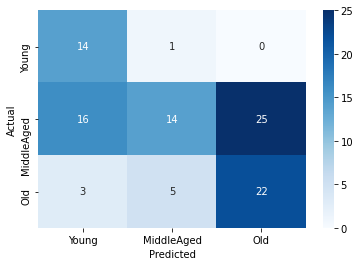

In [138]:
## build the confusion matrix as requested in the question

def result(predictions,validation):
    confusion_matrix = [[0,0,0],[0,0,0],[0,0,0]] # the # of classes are 3 so confusion matrix should be 3x3
    
    if(len(predictions) != len(validation)):
        print("Length is not true")
    else:
        for i in range(len(validation)):
            for item in range(1,4):
                if(validation.iat[i,8] == item):
                    confusion_matrix[item-1][predictions[i]-1] +=1
    true_classification = confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[2][2]
    miss_classification = len(validation) - true_classification
    accuracy            = true_classification / len(validation)
    print("confusion matrix: ",confusion_matrix)
    print("total correct classification : ",true_classification)
    print("total missclassification  : ",miss_classification)
    print("accuracy  : ",accuracy)
    
    classes = ["Young","MiddleAged", "Old"]
    
    s = sns.heatmap(confusion_matrix, annot=True, xticklabels=classes, 
            yticklabels=classes, fmt = "d", cmap='Blues')
    s.set_xlabel('Predicted', fontsize=10)
    s.set_ylabel('Actual', fontsize=10)

    return confusion_matrix

result(predictions,train100)


In [139]:
## calculate all of the above calculaitons 


def gaussian_distribution(train,validation,option):    
    
    y_prior = calculate_y_prior(train)
    sex_likelihoods = calculate_sex_likelihoods(train)
    train_values,keys = calculate_train_values(train)
    
    if(option == "Validation"): predict_set = validation
    elif(option == "Train"): predict_set = train
        
    predictions = predict_gaussian(predict_set,sex_likelihoods,train_values,y_prior,keys)
    confusion_matrix = result(predictions,predict_set)
    
    return confusion_matrix

In [140]:
#1) Assume gaussian distribution for continuous features. Report the accuracies for each of the following case:

 # 1.1) 100 samples for training, and rest for validation set
 # 1.2) 1000 samples for training, and rest for validation set
#For each of the above cases,
#- Report how many total misclassification errors are there on the
#training and validation sets, together with the confusion matrices.

confusion matrix:  [[14, 1, 0], [14, 15, 26], [3, 4, 23]]
total correct classification :  52
total missclassification  :  48
accuracy  :  0.52


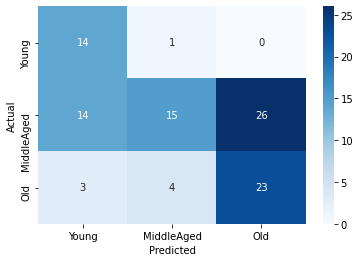

In [141]:
#1.1 answers for 100 instances
# train for 100 instances
cm100_train = gaussian_distribution(train100,validation100,"Train")

confusion matrix:  [[719, 88, 17], [468, 753, 1102], [56, 265, 609]]
total correct classification :  2081
total missclassification  :  1996
accuracy  :  0.5104243316163846


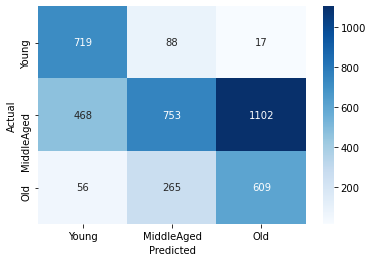

In [142]:
# validation for n-100 instances
cm100_validation = gaussian_distribution(train100,validation100,"Validation")

confusion matrix:  [[177, 22, 3], [129, 263, 183], [17, 79, 127]]
total correct classification :  567
total missclassification  :  433
accuracy  :  0.567


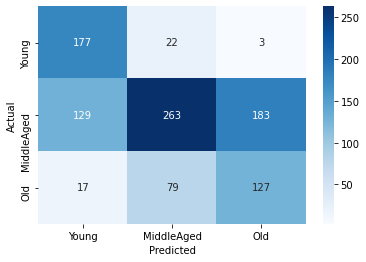

In [145]:
#1.2) 1000 instances for Training Set and rest is Validation Set
# train for 1000 instances

cm1000_train = gaussian_distribution(train1000,validation1000,"Train")

confusion matrix:  [[564, 69, 4], [379, 800, 624], [52, 323, 362]]
total correct classification :  1726
total missclassification  :  1451
accuracy  :  0.5432798237330815


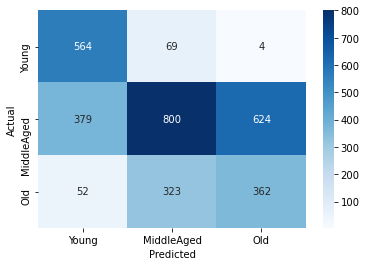

In [146]:
#1.2) 1000 instances for Training Set and rest is Validation Set
# validation for n-1000 instances

cm1000_validation = gaussian_distribution(train1000,validation1000,"Validation")

In [147]:
#ACCURACY RESULTS
correct_100 = cm100_validation[0][0] + cm100_validation[1][1] + cm100_validation[2][2] + cm100_train[0][0] + cm100_train[1][1] + cm100_train[2][2]
incorrect_100 = len(data) - correct_100

correct_1000 = cm1000_validation[0][0] + cm1000_validation[1][1] + cm1000_validation[2][2] + cm1000_train[0][0] + cm1000_train[1][1] + cm1000_train[2][2]
incorrect_1000 = len(data) - correct_1000


In [148]:
accuracy_100_gaussian = round((correct_100 / (correct_100 + incorrect_100)),4)
accuracy_1000_gaussian = round((correct_1000 / (correct_1000 + incorrect_1000)),4)

In [149]:
print("For both Train and Validation\n\nAccuracy of 100 samples:", accuracy_100_gaussian)
print("Accuracy of 1000 samples:", accuracy_1000_gaussian)

For both Train and Validation

Accuracy of 100 samples: 0.5107
Accuracy of 1000 samples: 0.549


In [ ]:
##### NAIVE ESTIMATOR #####

In [150]:
## build the idea at first for instances in the mylist

mylist = [0,1,2,34,52,3,1234,32,54,2,123,5,123,223,1231,23,2,1,2,34,5,1,78,79,5,4,7,9,0,7,67,5,45,1]
myclass = [1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1]
len(mylist)
intervals = []
count = 0
for i in range(len(mylist)):
    for j in range(len(mylist)):
        if mylist[j] <= mylist[i]+10 and mylist[j] >= mylist[i]-10:
            count = count+1
    intervals.append(count)
    count=0

In [151]:
## count the number of instances between specified interval (interval is calculated by using h)

def number_count(train100):

    t100 = train100.reset_index(drop = True)

    h_sizes = {
        "Length"    : 0.1,
        "Diameter"  : 0.1,
        "Height"    : 0.05,
        "Whole Weight"   : 0.1,
        "Shucked Weight" : 0.1,
        "Viscera Weight" : 0.1,
        "Shell Weight"   : 0.1
    }

    train_values = {
        "Length"    : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Diameter"  : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Height"    : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Whole Weight"   : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Shucked Weight" : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Viscera Weight" : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Shell Weight"   : { 0 : { 1: 0, 2: 0, 3: 0} }
    }

    keys = [] 
    for key in train_values.keys(): 
        keys.append(key) 
    count=0   
    for key in keys:
        for c in range(1,4):
                for i in range(len(t100)):
                    for j in range(len(t100)):
                        if t100[key][j] <= t100[key][i] + h_sizes[key]  and t100[key][j] >= t100[key][i] - h_sizes[key] and t100["y"][j] == c:
                            count += 1
                train_values[key][0][c] = count
                count=0
                    
                
    
    return train_values

In [163]:
# specify keys and values parameters for the above calculation
values = number_count(train100)
values
keys = [] 
for key in train_values.keys(): 
    keys.append(key) 

In [153]:
   # specify empty train_Values and determine h_size for each parameter
    train_values = {
        "Length"    : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Diameter"  : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Height"    : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Whole Weight"   : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Shucked Weight" : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Viscera Weight" : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Shell Weight"   : { 0 : { 1: 0, 2: 0, 3: 0} }
    }
    h_sizes = {
        "Length"    : 0.2,
        "Diameter"  : 0.2,
        "Height"    : 0.3,
        "Whole Weight"   : 0.1,
        "Shucked Weight" : 0.1,
        "Viscera Weight" : 0.2,
        "Shell Weight"   : 0.2
    }

In [102]:
## calculate the probabilities using the formula: (#of instances within specified interval)/(2*N*h)
def calculate_probabilities(values,train100):
    train_values = {
        "Length"    : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Diameter"  : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Height"    : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Whole Weight"   : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Shucked Weight" : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Viscera Weight" : { 0 : { 1: 0, 2: 0, 3: 0} },
        "Shell Weight"   : { 0 : { 1: 0, 2: 0, 3: 0} }
    }
    h_sizes = {
        "Length"    : 0.5,
        "Diameter"  : 0.2,
        "Height"    : 0.5,
        "Whole Weight"   : 0.1,
        "Shucked Weight" : 0.1,
        "Viscera Weight" : 0.2,
        "Shell Weight"   : 0.2
    }
    
    keys = [] 
    for key in train_values.keys(): 
        keys.append(key) 


    N = len(train100)*len(train100)
    for key in keys:
        for i in range(len(values)):
            for c in range(1,4):
                train_values[key][0][c] = values[key][0][c]/(2*N*h_sizes[key])
                
    return train_values

probabilities = calculate_probabilities(values,train100)
probabilities

{'Length': {0: {1: 0.0312, 2: 0.3267, 3: 0.134}},
 'Diameter': {0: {1: 0.0965, 2: 0.9535, 3: 0.39025}},
 'Height': {0: {1: 0.0621, 2: 0.4531, 3: 0.1719}},
 'Whole Weight': {0: {1: 0.064, 2: 0.407, 3: 0.152}},
 'Shucked Weight': {0: {1: 0.1535, 2: 0.8975, 3: 0.34}},
 'Viscera Weight': {0: {1: 0.131, 2: 0.811, 3: 0.315}},
 'Shell Weight': {0: {1: 0.0995, 2: 0.64925, 3: 0.21875}}}

In [164]:
#calculate the predictions using naive estimator.
def predict_naive(test, sex_likelihoods, values, y_prior, keys, h_sizes):
    
    predictions=[]
    
    for row in range(len(test)):
        elementPrediction= [0,1,1,1]

        for i in range(1,4):
            if  (test.iat[row,0] == "M"): elementPrediction[i] *= sex_likelihoods["M"][i]
            elif(test.iat[row,0] == "I"): elementPrediction[i] *= sex_likelihoods["I"][i]
            elif(test.iat[row,0] == "F"): elementPrediction[i] *= sex_likelihoods["F"][i]

            for index in keys:
            
                elementPrediction[i] *= calculate_probabilities(values,train100)[index][0][i]
            elementPrediction[i] *= y_prior[i]
            elementPrediction[i] = round(elementPrediction[i],4)
        predictions.append(elementPrediction.index(max(elementPrediction)))
    return predictions



In [193]:
#take a look at the predictions.
first = predict_naive(train100, sex_likelihoods, values, y_prior, keys, h_sizes)
first[0:5]

[2, 2, 2, 2, 2]

In [173]:
## build the confusion matrix as requested in the question.
def naive_estimator(test,train,validation,option,h_sizes,values,keys):    
    
    y_prior = calculate_y_prior(test)
    sex_likelihoods = calculate_sex_likelihoods(test)
    
    if(option == "Validation"): test = validation
    elif(option == "Train"): test = train
    
    predictions = predict_naive(test, sex_likelihoods, values, y_prior, keys, h_sizes)
    confusion_matrix = result(predictions,test)
    confusion_matrix
    return confusion_matrix


In [ ]:
#### RESULTS FOR 2ND QUESTION #######

In [170]:
#2) Use Naive Estimator for each of the continuous feature. Determine the bin size for each feature with your own criterion. Report the accuracies for each of the following case:

 # 2.1) 100 samples for training, and rest for validation set
  # 2.2) 1000 samples for training, and rest for validation set

#For each of the above cases,
# Report how many total misclassification errors are there on the
# training and validation sets, together with the confusion matrices.

confusion matrix:  [[0, 824, 0], [0, 2323, 0], [0, 930, 0]]
total correct classification :  2323
total missclassification  :  1754
accuracy  :  0.5697817022320334


[[0, 824, 0], [0, 2323, 0], [0, 930, 0]]

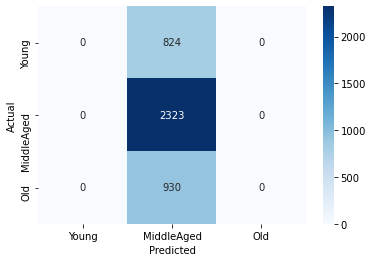

In [175]:
#2.1) validation

confusion_100_valid = naive_estimator(data,train100,validation100,"Validation",h_sizes,values,keys)
confusion_100_valid

confusion matrix:  [[0, 15, 0], [0, 55, 0], [0, 30, 0]]
total correct classification :  55
total missclassification  :  45
accuracy  :  0.55


[[0, 15, 0], [0, 55, 0], [0, 30, 0]]

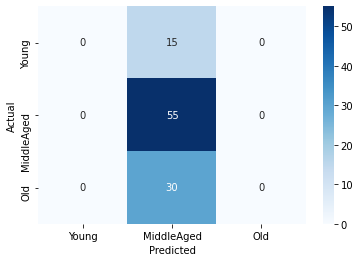

In [176]:
#2.1) train
confusion_100_train = naive_estimator(data,train100,validation100,"Train",h_sizes,values,keys)
confusion_100_train

confusion matrix:  [[0, 637, 0], [0, 1803, 0], [0, 737, 0]]
total correct classification :  1803
total missclassification  :  1374
accuracy  :  0.5675165250236072


[[0, 637, 0], [0, 1803, 0], [0, 737, 0]]

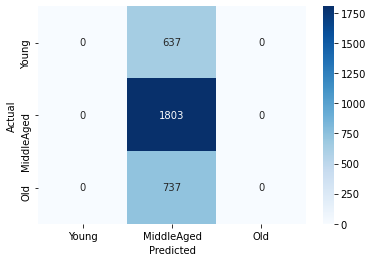

In [177]:
#2.2) validation

confusion_1000_valid = naive_estimator(data,train1000,validation1000,"Validation",h_sizes,values,keys)
confusion_1000_valid

confusion matrix:  [[0, 202, 0], [0, 575, 0], [0, 223, 0]]
total correct classification :  575
total missclassification  :  425
accuracy  :  0.575


[[0, 202, 0], [0, 575, 0], [0, 223, 0]]

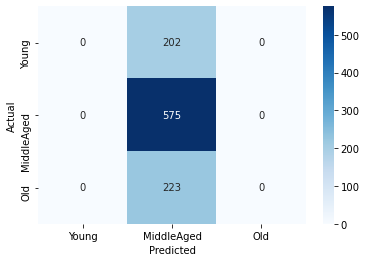

In [178]:
#2.2) train

confusion_1000_train = naive_estimator(data,train1000,validation1000,"Train",h_sizes,values,keys)
confusion_1000_train

In [180]:
# sum the number of true predictions and missclassification for training and validation for each case.

true_100 = confusion_100_valid[0][0] + confusion_100_valid[1][1] + confusion_100_valid[2][2] + confusion_100_train[0][0] + confusion_100_train[1][1] + confusion_100_train[2][2]
miss_100 = len(data) - true_100

true_1000 = confusion_1000_valid[0][0] + confusion_1000_valid[1][1] + confusion_1000_valid[2][2] + confusion_1000_train[0][0] + confusion_1000_train[1][1] + confusion_1000_train[2][2]
miss_1000 = len(data) - true_1000

In [184]:
#calculate the accuracy of predictions.

accuracy_100_naive = round((true_100 / (true_100 + miss_100)),4)
accuracy_1000_naive = round((true_1000 / (true_1000 + miss_1000)),4)

In [185]:
print("For both Train and Validation\n\nAccuracy of 100 samples:", accuracy_100_naive)
print("Accuracy of 1000 samples:", accuracy_1000_naive)

For both Train and Validation

Accuracy of 100 samples: 0.5693
Accuracy of 1000 samples: 0.5693
